# Data Visualisation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the classic winner/loser dataset generated from our processing pipeline
df = pd.read_csv('../../Datasets/final_tennis_dataset.csv')

## ELO

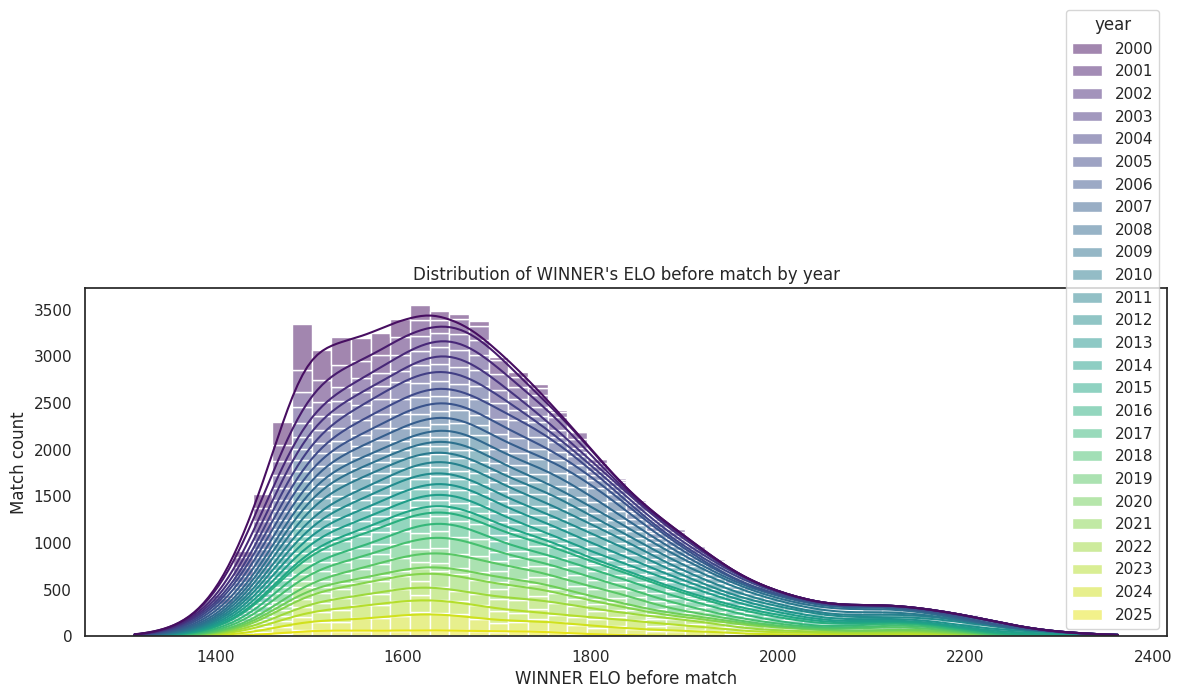

In [24]:
# Load the classic winner/loser dataset generated from our processing pipeline
df = pd.read_csv('../../Datasets/final_tennis_dataset.csv')

# Ensure that the 'year' column is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

## 1. ELO Distribution (WINNER ELO before match)
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='WINNER_ELO_BEFORE',
    hue=df['year'].astype(str),
    bins=50,
    kde=True,
    multiple='stack',
    palette='viridis'
)
plt.title("Distribution of WINNER's ELO before match by year")
plt.xlabel("WINNER ELO before match")
plt.ylabel("Match count")
plt.tight_layout()
plt.show()

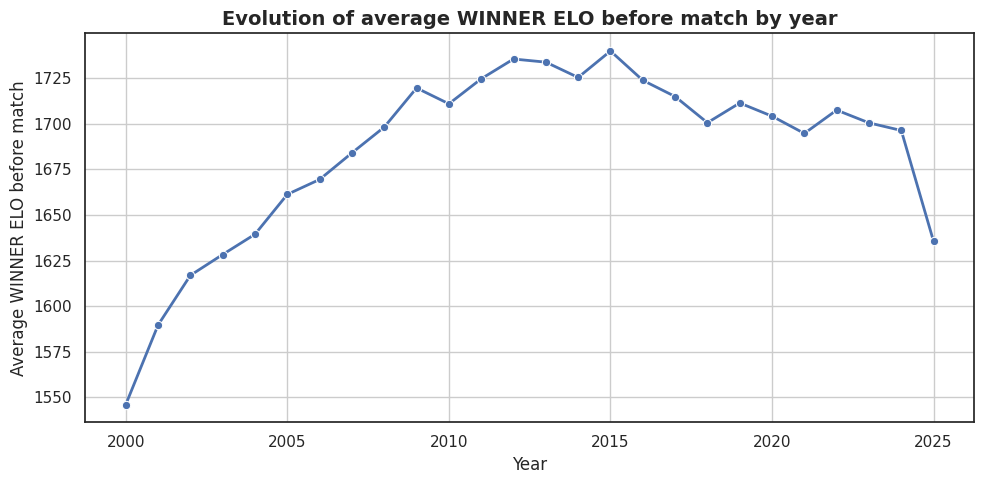

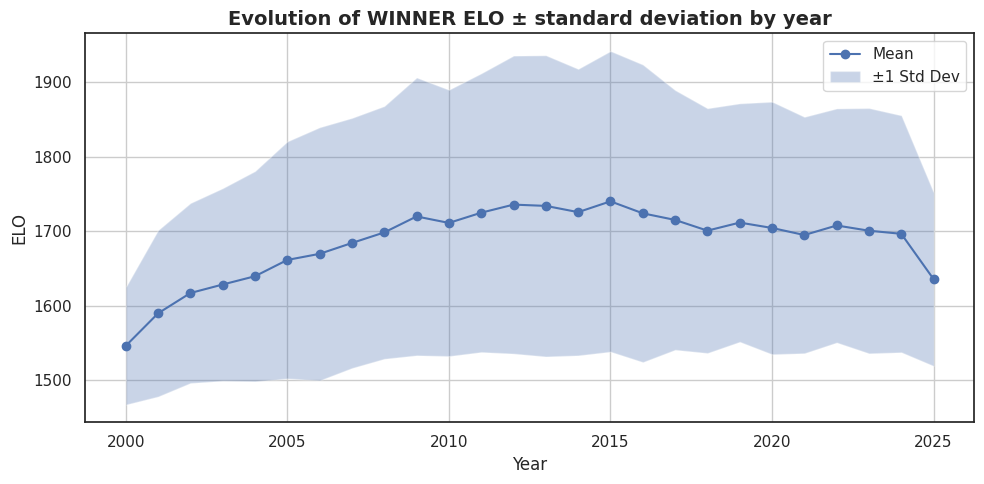

In [25]:

# Compute the mean WINNER_ELO_BEFORE per year
elo_mean_by_year = df.groupby('year')['WINNER_ELO_BEFORE'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=elo_mean_by_year, x='year', y='WINNER_ELO_BEFORE', marker='o', linewidth=2)
plt.title("Evolution of average WINNER ELO before match by year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average WINNER ELO before match", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute mean and standard deviation of WINNER_ELO_BEFORE by year
elo_stats = df.groupby('year')['WINNER_ELO_BEFORE'].agg(['mean', 'std']).reset_index()
# Ensure data types are appropriate
elo_stats = elo_stats.dropna().astype({'mean': 'float', 'std': 'float', 'year': 'int'})

plt.figure(figsize=(10, 5))
plt.plot(elo_stats['year'], elo_stats['mean'], label='Mean', marker='o')
plt.fill_between(
    elo_stats['year'],
    elo_stats['mean'] - elo_stats['std'],
    elo_stats['mean'] + elo_stats['std'],
    alpha=0.3,
    label='±1 Std Dev'
)
plt.title("Evolution of WINNER ELO ± standard deviation by year", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("ELO")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

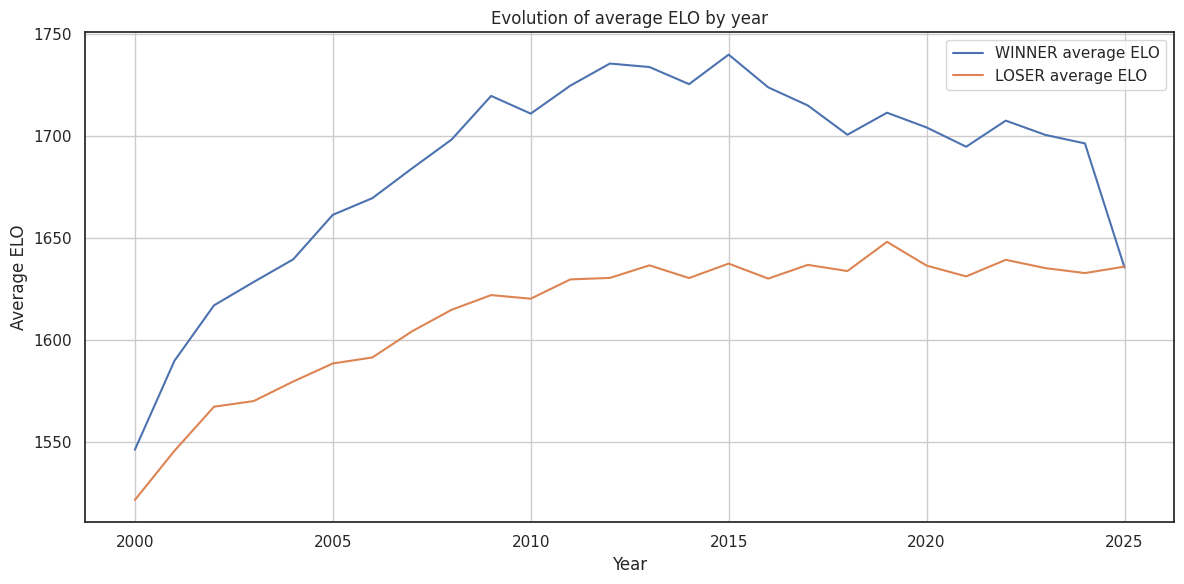

In [26]:
## 2. Comparison of average ELO for winners and losers over time
elo_yearly = df.groupby('year')[['WINNER_ELO_BEFORE', 'LOSER_ELO_BEFORE']].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(elo_yearly['year'], elo_yearly['WINNER_ELO_BEFORE'], label='WINNER average ELO')
plt.plot(elo_yearly['year'], elo_yearly['LOSER_ELO_BEFORE'], label='LOSER average ELO')
plt.title("Evolution of average ELO by year")
plt.xlabel("Year")
plt.ylabel("Average ELO")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation

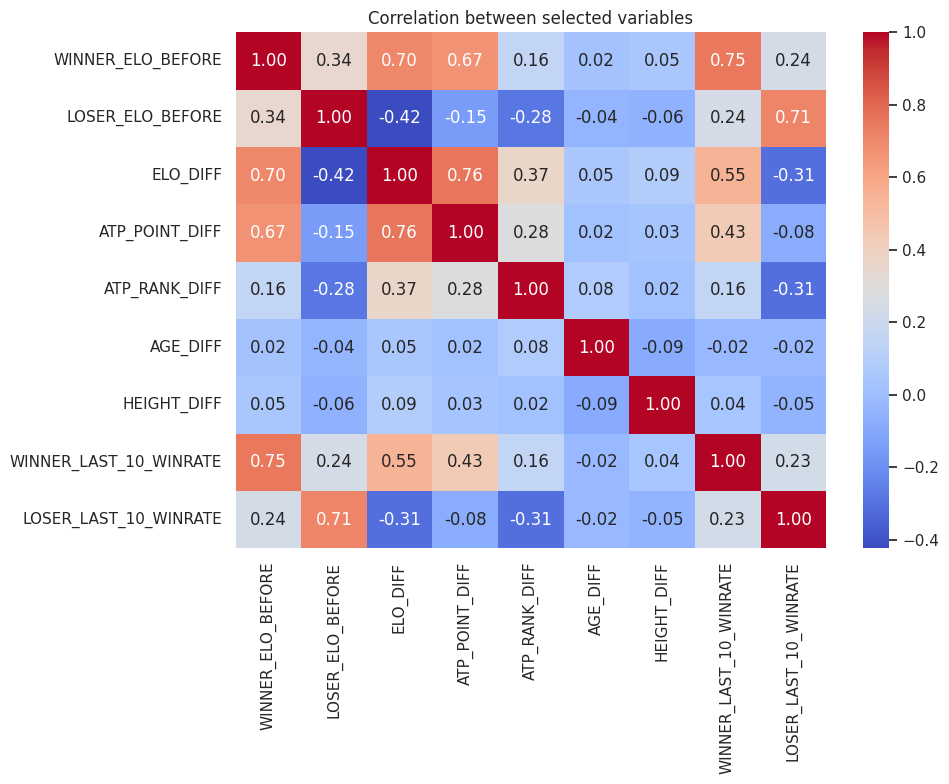

In [27]:

## 3. Correlation Heatmap for Selected Features
# Define a subset of features to analyze
features_subset = [
    'WINNER_ELO_BEFORE', 'LOSER_ELO_BEFORE', 'ELO_DIFF',
    'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF', 'HEIGHT_DIFF',
    'WINNER_LAST_10_WINRATE', 'LOSER_LAST_10_WINRATE'
]
plt.figure(figsize=(10, 8))
corr = df[features_subset].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between selected variables")
plt.tight_layout()
plt.show()

## MATCHES

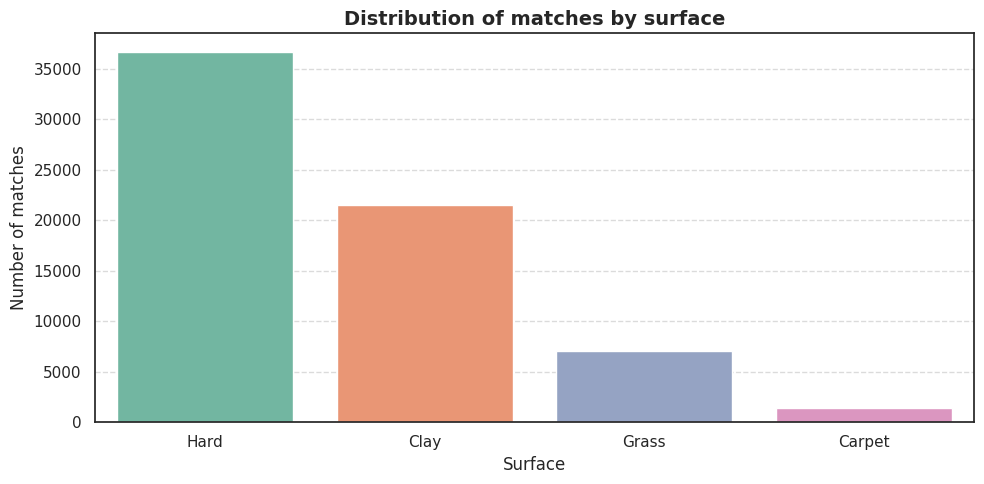

In [28]:

## 4. Matches Distribution by Surface
plt.figure(figsize=(10, 5))
sns.set(style="white")
# Use a palette with as many colors as there are unique surfaces
palette = sns.color_palette("Set2", n_colors=df['surface_raw'].nunique())

sns.countplot(
    data=df,
    x='surface_raw',
    hue='surface_raw',
    order=df['surface_raw'].value_counts().index,
    palette=palette,
    legend=False
)
plt.title("Distribution of matches by surface", fontsize=14, fontweight='bold')
plt.xlabel("Surface", fontsize=12)
plt.ylabel("Number of matches", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Advanced stats

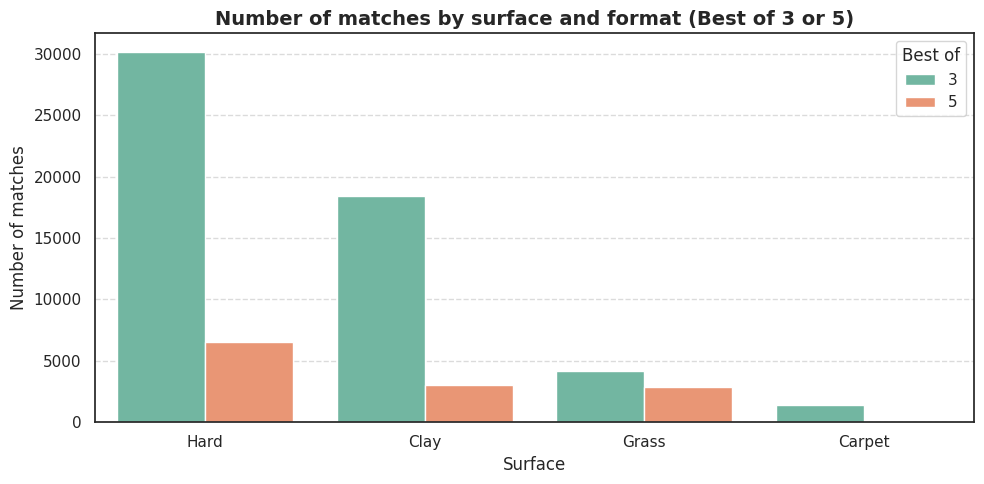

In [29]:

## 5. Advanced Statistics: Matches count by Surface and Format (Best of 3 or 5)
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='surface_raw',
    hue='best_of',
    palette='Set2'
)
plt.title("Number of matches by surface and format (Best of 3 or 5)", fontsize=14, fontweight='bold')
plt.xlabel("Surface")
plt.ylabel("Number of matches")
plt.legend(title="Best of")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:

# Display the first few rows of the dataset
df.head()

,tourney_id,tourney_name,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,P_2NDWON_WINNER_LAST_2000,P_2NDWON_LOSER_LAST_2000,P_BPSAVED_WINNER_LAST_2000,P_BPSAVED_LOSER_LAST_2000,WINNER_ELO_BEFORE,LOSER_ELO_BEFORE,ELO_DIFF,WINNER_ELO_SURFACE_BEFORE,LOSER_ELO_SURFACE_BEFORE,ELO_SURFACE_DIFF
0,2000-339,Adelaide,32.0,A,1970-01-01 00:00:00.020000103,14,101792,NaN,NaN,Slava Dosedel,...,0.500000,0.5,0.500000,0.5,1500.000000,1500.0,0.000000,1500.000000,1500.0,0.000000
1,2000-891,Chennai,32.0,A,1970-01-01 00:00:00.020000103,31,102259,4.0,NaN,Jerome Golmard,...,0.500000,0.5,0.500000,0.5,1500.000000,1500.0,0.000000,1500.000000,1500.0,0.000000
2,2000-891,Chennai,32.0,A,1970-01-01 00:00:00.020000103,30,103082,NaN,NaN,Markus Hantschk,...,36.734694,0.5,64.285714,0.5,1484.000000,1500.0,-16.000000,1484.000000,1500.0,-16.000000
3,2000-891,Chennai,32.0,A,1970-01-01 00:00:00.020000103,28,101611,2.0,NaN,Cedric Pioline,...,57.894737,0.5,60.000000,0.5,1483.263693,1500.0,-16.736307,1483.263693,1500.0,-16.736307
4,2000-891,Chennai,32.0,A,1970-01-01 00:00:00.020000103,27,103082,NaN,NaN,Markus Hantschk,...,52.653061,0.5,69.642857,0.5,1500.736307,1500.0,0.736307,1500.736307,1500.0,0.736307


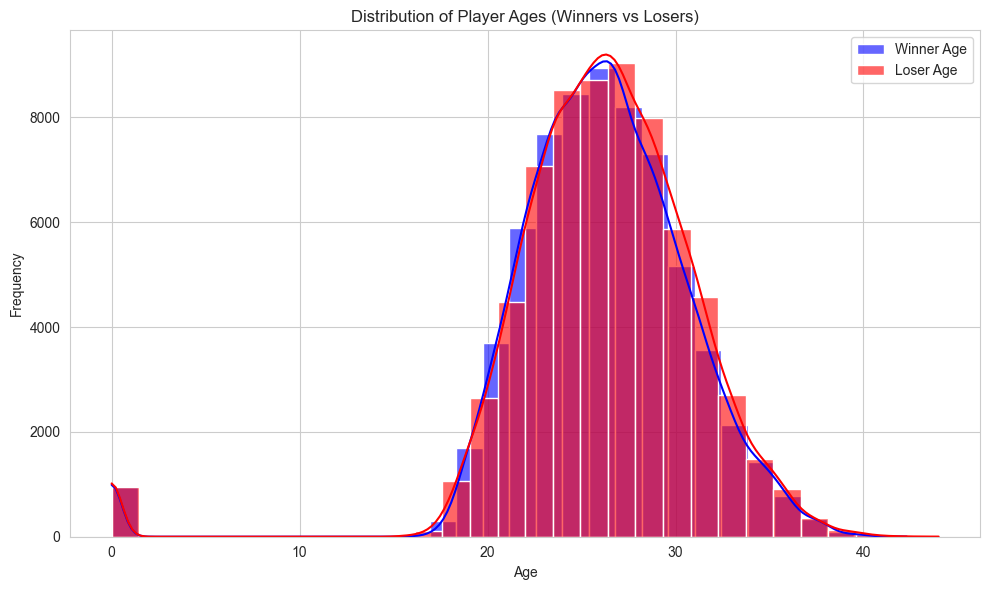

/tmp/ipykernel_3809854/770536429.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


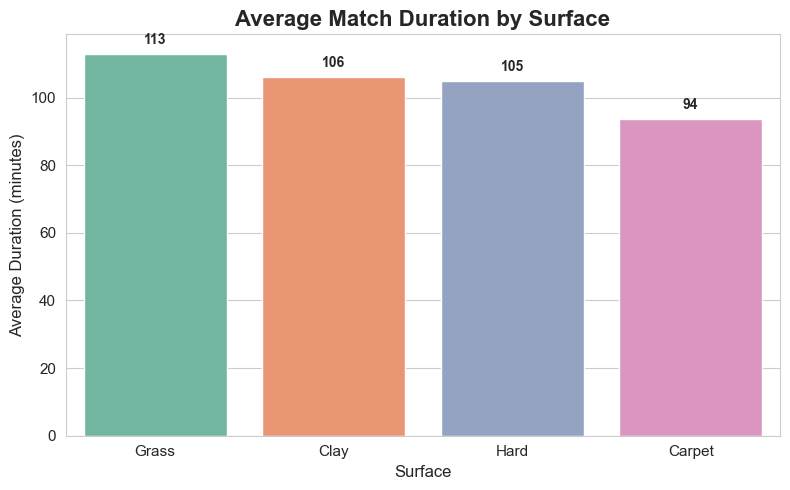

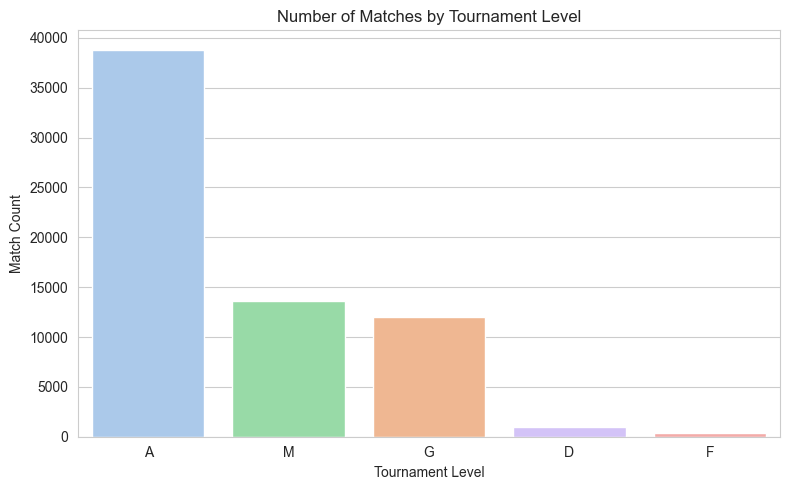

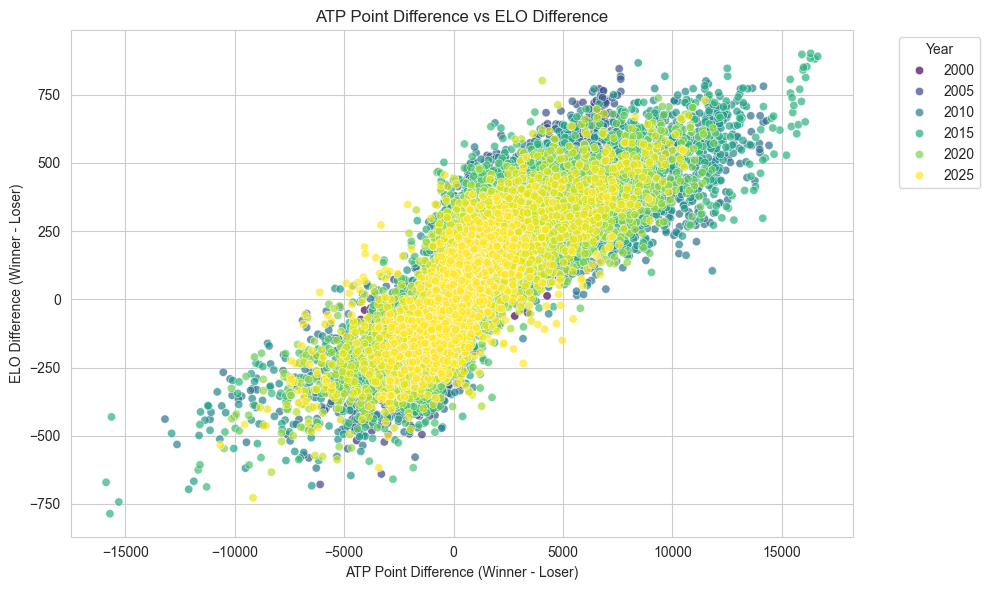

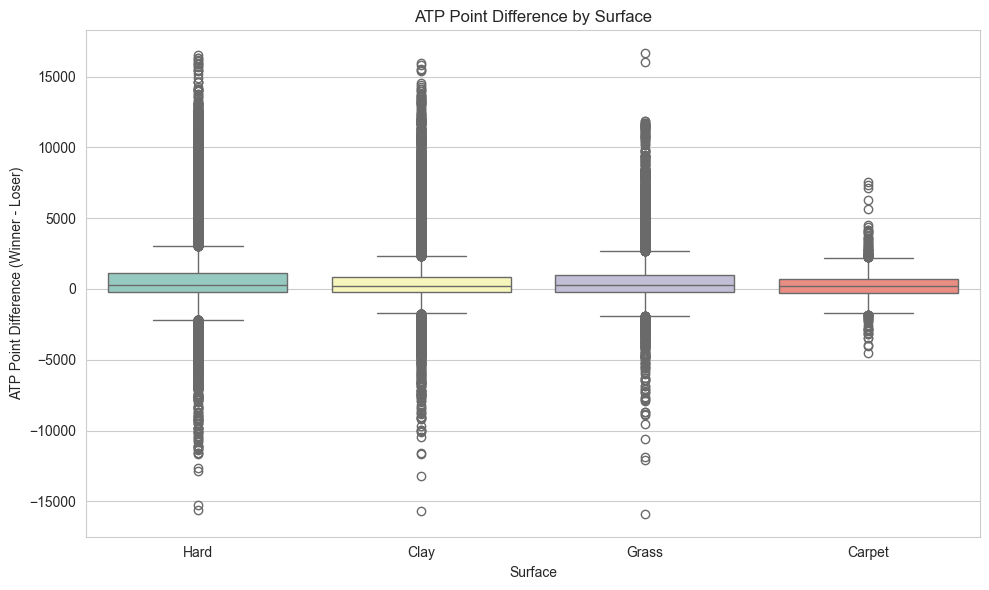

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (classic winner/loser dataset)
df = pd.read_csv('../../Datasets/final_tennis_dataset.csv')

# Ensure that the 'year' column is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# -------------------------------------------------------------------
# 1. Distribution of Player Ages (Winner vs Loser)
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='winner_age', bins=30, color='blue', label='Winner Age', kde=True, alpha=0.6)
sns.histplot(data=df, x='loser_age', bins=30, color='red', label='Loser Age', kde=True, alpha=0.6)
plt.title("Distribution of Player Ages (Winners vs Losers)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 2. Average Match Duration by Surface
# -------------------------------------------------------------------
df['minutes'] = pd.to_numeric(df['minutes'], errors='coerce')

duration_by_surface = df.groupby('surface_raw')['minutes'].mean().reset_index()
duration_by_surface = duration_by_surface.sort_values('minutes', ascending=False)

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=duration_by_surface,
    x='surface_raw',
    y='minutes',
    palette='Set2'
)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height:.0f}',                        
        xy=(bar.get_x() + bar.get_width() / 2, height), 
        xytext=(0, 5),                               
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Average Match Duration by Surface", fontsize=16, fontweight='bold')
plt.xlabel("Surface", fontsize=12)
plt.ylabel("Average Duration (minutes)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3. Matches Count by Tournament Level
# -------------------------------------------------------------------
if 'tourney_level' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='tourney_level', hue='tourney_level', palette='pastel', order=df['tourney_level'].value_counts().index, legend=False)
    plt.title("Number of Matches by Tournament Level")
    plt.xlabel("Tournament Level")
    plt.ylabel("Match Count")
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# 4. Relationship between ATP Point Difference and ELO Difference
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ATP_POINT_DIFF', y='ELO_DIFF', hue='year', palette='viridis', alpha=0.7)
plt.title("ATP Point Difference vs ELO Difference")
plt.xlabel("ATP Point Difference (Winner - Loser)")
plt.ylabel("ELO Difference (Winner - Loser)")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 5. Boxplot of ATP Point Difference by Surface
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='surface_raw', y='ATP_POINT_DIFF', hue='surface_raw', palette='Set3', dodge=False, legend=False)
plt.title("ATP Point Difference by Surface")
plt.xlabel("Surface")
plt.ylabel("ATP Point Difference (Winner - Loser)")
plt.tight_layout()
plt.show()